# Introduction

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this under-served population has a positive loan experience, Home Credit makes use of a variety of alternative data including telco and transactional information to predict their clients' repayment abilities.

The main aim is to build a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan. This a supervised classification problem. Classification is the process of predicting a new target variable's class on the basis of a training set of data containing observations (or instances) whose category membership is already known.It is considered as a form of supervised learning, i.e., learning where a training set of correctly identified observations is available. This classification in unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance. 

The Classification problems are divided into two main categories:
- Binary Classification Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.
- Multiple classification problems: These problems can have multiple classifiers.

In this notebook we deal with binary classification problem where the target variable is to predict whether the loan is repaid or not.

## Data Description

- <b>application_{train|test}.csv</b>
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.

- <b>bureau.csv</b>
    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- <b>bureau_balance.csv</b>

    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- <b>POS_CASH_balance.csv</b>

    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- <b>credit_card_balance.csv</b>

    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- <b>previous_application.csv</b>

    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

- <b>installments_payments.csv</b>

    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- <b>HomeCredit_columns_description.csv</b>
    - This file contains descriptions for the columns in the various data files.
    
<br>

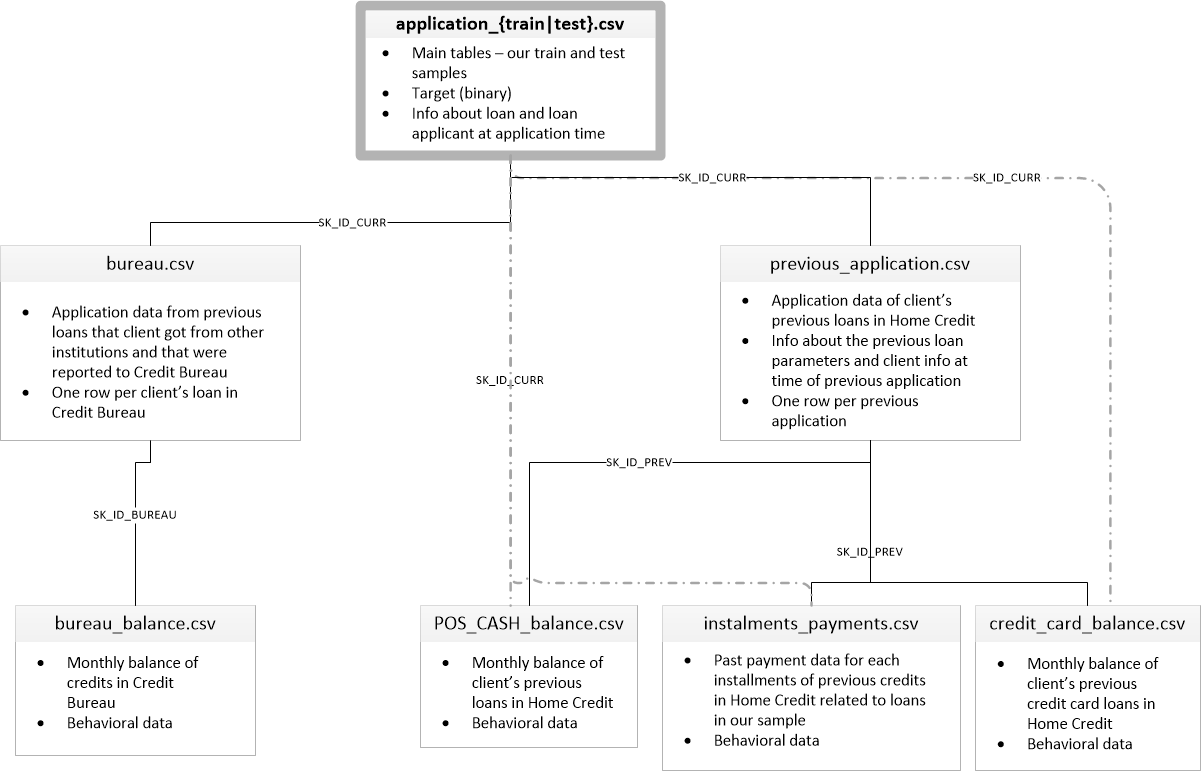

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder

## Reading the Data

In [2]:
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', application_train.shape)
application_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [3]:
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [4]:
print(application_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

### Examine Missing Values

In [5]:
def display_missing_data(df):
        ms_sum = df.isnull().sum()
        ms_percent = 100 * df.isnull().sum() / len(df)
        ms_df = pd.concat([ms_sum, ms_percent], axis=1)        
        ms_df1 = ms_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        ms_df1 = ms_df1[ms_df1.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print (f"Total Columns: {str(df.shape[1])}")
        print(f"Found Missing Values in {str(ms_df1.shape[0])} columns")        
        return ms_df1

In [6]:
display_missing_data(application_train)

Total Columns: 122
Found Missing Values in 67 columns


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
...                                  ...                ...
EXT_SOURCE_2                         660                0.2
AMT_GOODS_PRICE                      278                0.1
AMT_ANNUITY                           12                0.0
CNT_FAM_MEMBERS                        2                0.0
DAYS_LAST_PHONE_CHANGE                 1                0.0

[67 rows x 2 columns]

## Column Data Types

In [7]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Data Visualizations

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### Target Variable Distribution

In [8]:
x = application_train['TARGET'].value_counts()
labels = ['Loan Not Repaid', 'Loan Repaid']
fig = go.Figure(data=[
    go.Pie(labels=labels,
           values=x,
           textinfo='label+percent',
           insidetextorientation='radial')
])
fig.show()

On seeing the above graph we can say that the data is highly imbalanced. The loan which are repaid are very less compared ones that are not repayed. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

### Types of Loan 

In [9]:
import plotly
t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]

labels = ['Cash Loans', 'Revolving Loans']

fig = plotly.subplots.make_subplots(
    rows=1,
    cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Overall distribution', 'Target specific (t=1)', 'Target specific (t=0)'])

fig.add_trace(
    go.Pie(
        labels=labels,
        values=application_train['NAME_CONTRACT_TYPE'].value_counts(),
        name="Overall"), 1, 1)
fig.add_trace(
    go.Pie(labels=labels,
           values=t1['NAME_CONTRACT_TYPE'].value_counts(),
           name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(
    go.Pie(labels=labels,
           values=t0['NAME_CONTRACT_TYPE'].value_counts(),
           name="Returned Loan(t=0)"), 1, 3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Types of Loans",
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)]
)

fig.layout.template = 'plotly_white'
fig.show()

### Gender of the applicants

In [10]:
t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]

labels = ['Male', 'Female']

fig = plotly.subplots.make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=['Overall distribution', 'Target specific (t=1)', 'Target specific (t=0)'])
fig.add_trace(go.Pie(labels=labels,
                     values=application_train['CODE_GENDER'].value_counts(),
                     name="Overall"), 1, 1)
fig.add_trace(go.Pie(labels=labels,
                     values=t1['CODE_GENDER'].value_counts(),
                     name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(go.Pie(labels=labels,
                     values=t0['CODE_GENDER'].value_counts(),
                     name="Returned Loan(t=0)"), 1, 3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Types of Loans",
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)])

fig.layout.template = 'plotly_white'
fig.show()

## Client's Income Type

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

In [11]:
income_val = application_train['NAME_INCOME_TYPE'].value_counts()
income_val_y0 = []
income_val_y1 = []

for val in income_val.index:
    income_val_y1.append(
        np.sum(application_train['TARGET'][application_train['NAME_INCOME_TYPE'] == val] == 1))
    income_val_y0.append(
        np.sum(application_train['TARGET'][application_train['NAME_INCOME_TYPE'] == val] == 0))

    data = [
        go.Bar(x=income_val.index,
               y=((income_val_y1 / income_val.sum()) * 100),
               name='Yes'),
        go.Bar(x=income_val.index,
               y=((income_val_y0 / income_val.sum()) * 100),
               name='No')
    ]

layout = go.Layout(
    title="Income sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(title='Income source', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

### Distribution of Education 

Distribution of education of the applicant in terms of loan repaid or not. People with Academic Degree are more likely to repay the loan(Out of 164, only 3 applicants are not able to repay)

In [12]:
education_val = application_train['NAME_EDUCATION_TYPE'].value_counts()
education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(application_train['TARGET'][application_train['NAME_EDUCATION_TYPE']==val] == 1))
    education_val_y0.append(np.sum(application_train['TARGET'][application_train['NAME_EDUCATION_TYPE']==val] == 0))
data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Yes' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Education sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Education of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of Housing type

In [13]:
housing_val = application_train['NAME_HOUSING_TYPE'].value_counts()
housing_val_y0 = []
housing_val_y1 = []

for val in housing_val.index:
    housing_val_y1.append(
        np.sum(application_train['TARGET'][application_train['NAME_HOUSING_TYPE'] == val] == 1))
    housing_val_y0.append(
        np.sum(application_train['TARGET'][application_train['NAME_HOUSING_TYPE'] == val] == 0))

data = [
    go.Bar(x=housing_val.index,
           y=((housing_val_y1 / housing_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=housing_val.index,
           y=((housing_val_y0 / housing_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Types of House which the applicants applied for loan in terms of loan repayed or not",
    xaxis=dict(title='Housing of Applicants', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of Family Status 

In [14]:
family_val = application_train['NAME_FAMILY_STATUS'].value_counts()
family_val_y0 = []
family_val_y1 = []

for val in family_val.index:
    family_val_y1.append(
        np.sum(application_train['TARGET'][application_train['NAME_FAMILY_STATUS'] == val] == 1))
    family_val_y0.append(
        np.sum(application_train['TARGET'][application_train['NAME_FAMILY_STATUS'] == val] == 0))

data = [
    go.Bar(x=family_val.index,
           y=((family_val_y1 / family_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=family_val.index,
           y=((family_val_y0 / family_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Family Status of Applicants in terms of loan repayed or not",
    xaxis=dict(title='Family Status of Applicants', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Occupation of the applicant

In [15]:
occupation_val = application_train['OCCUPATION_TYPE'].value_counts()
occupation_val_y0 = []
occupation_val_y1 = []

for val in occupation_val.index:
    occupation_val_y1.append(
        np.sum(application_train['TARGET'][application_train['OCCUPATION_TYPE']== val] == 1))
    occupation_val_y0.append(
        np.sum(application_train['TARGET'][application_train['OCCUPATION_TYPE']== val] == 0))

data = [
    go.Bar(x=occupation_val.index,
           y=((occupation_val_y1 / occupation_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=occupation_val.index,
           y=((occupation_val_y0 / occupation_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Types of occupation of Applicants in terms of loan is repayed or not",
    xaxis=dict(title='Occupations', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of various other numerical columns

<Figure size 432x288 with 0 Axes>

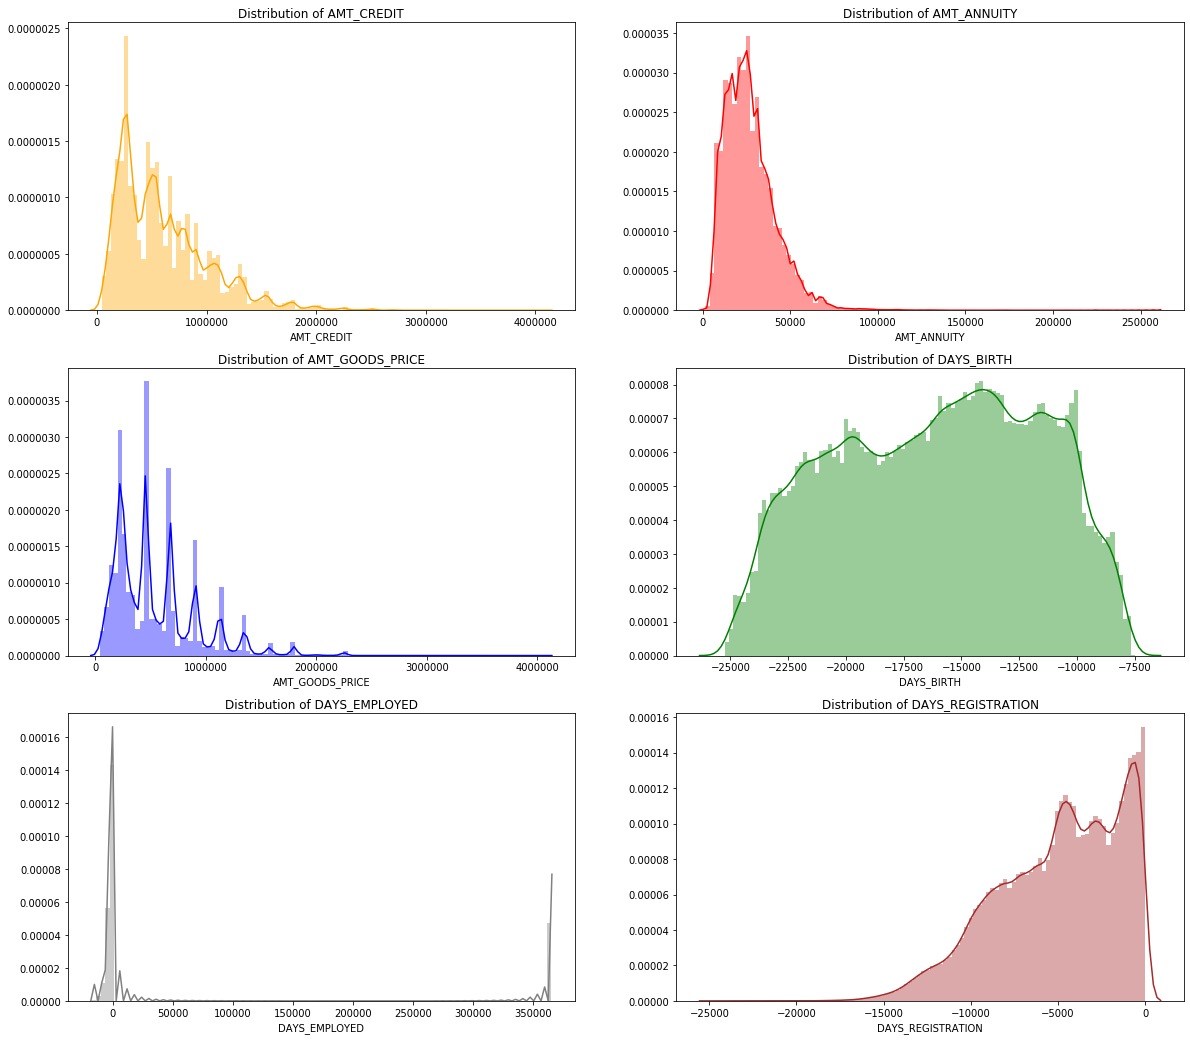

In [16]:
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(20,6*3))
plt.subplot(3,2,1)
plt.title("Distribution of %s" % 'AMT_CREDIT')
sns.distplot(application_train['AMT_CREDIT'].dropna(),color='orange', kde=True,bins=100)

plt.subplot(3,2,2)
plt.title("Distribution of %s" % 'AMT_ANNUITY')
sns.distplot(application_train['AMT_ANNUITY'].dropna(),color='red', kde=True,bins=100)

plt.subplot(3,2,3)
plt.title("Distribution of %s" % 'AMT_GOODS_PRICE')
sns.distplot(application_train['AMT_GOODS_PRICE'].dropna(),color='blue', kde=True,bins=100)

plt.subplot(3,2,4)
plt.title("Distribution of %s" % 'DAYS_BIRTH')
sns.distplot(application_train['DAYS_BIRTH'].dropna(),color='green', kde=True,bins=100)

plt.subplot(3,2,5)
plt.title("Distribution of %s" % 'DAYS_EMPLOYED')
sns.distplot(application_train['DAYS_EMPLOYED'].dropna(),color='grey', kde=True,bins=100)

plt.subplot(3,2,6)
plt.title("Distribution of %s" % 'DAYS_REGISTRATION')
sns.distplot(application_train['DAYS_REGISTRATION'].dropna(),color='brown', kde=True,bins=100)
plt.show()

## Comparison of the interval values with the target

<Figure size 432x288 with 0 Axes>

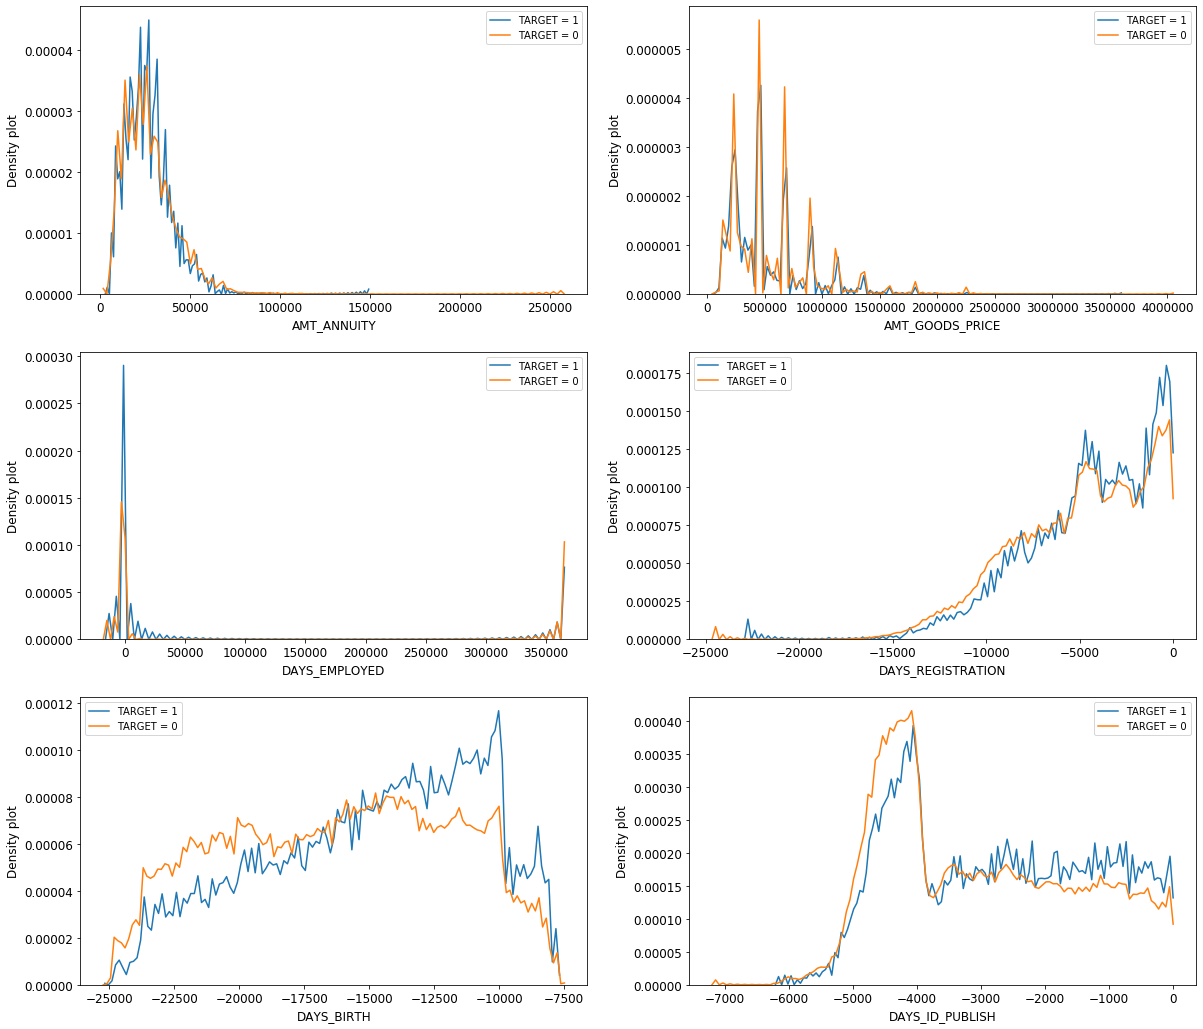

In [17]:
t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]
    
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(20,6*3))
plt.subplot(3,2,1)
sns.kdeplot(t1['AMT_ANNUITY'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['AMT_ANNUITY'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_ANNUITY', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,2)
sns.kdeplot(t1['AMT_GOODS_PRICE'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['AMT_GOODS_PRICE'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_GOODS_PRICE', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,3)
sns.kdeplot(t1['DAYS_EMPLOYED'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_EMPLOYED'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_EMPLOYED', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,4)
sns.kdeplot(t1['DAYS_REGISTRATION'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_REGISTRATION'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_REGISTRATION', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,5)
sns.kdeplot(t1['DAYS_BIRTH'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_BIRTH'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_BIRTH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,6)
sns.kdeplot(t1['DAYS_ID_PUBLISH'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_ID_PUBLISH'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_ID_PUBLISH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show();

## Selecting Feature and Target columns

In [18]:
for col in range(len(application_train.columns.values)):
    print(application_train.columns[col])

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [19]:
columns = [
"TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", 
"FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", 
"AMT_CREDIT", "AMT_ANNUITY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
"NAME_FAMILY_STATUS", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", 
"REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
"WEEKDAY_APPR_PROCESS_START", "AMT_REQ_CREDIT_BUREAU_HOUR", 
"AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", 
"AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", 
"AMT_REQ_CREDIT_BUREAU_YEAR"
]

In [20]:
df = application_train[columns]

## Sampling Subset of the Data

In [21]:
df = df[(df["TARGET"] == 1)]

In [22]:
df.shape

(24825, 23)

## Handling Missing data

In [23]:
display_missing_data(df)

Total Columns: 23
Found Missing Values in 6 columns


Missing Values  % of Total Values
AMT_REQ_CREDIT_BUREAU_HOUR            4292               17.3
AMT_REQ_CREDIT_BUREAU_DAY             4292               17.3
AMT_REQ_CREDIT_BUREAU_WEEK            4292               17.3
AMT_REQ_CREDIT_BUREAU_MON             4292               17.3
AMT_REQ_CREDIT_BUREAU_QRT             4292               17.3
AMT_REQ_CREDIT_BUREAU_YEAR            4292               17.3

### Filling missing values with mean of the column

In [24]:
df.fillna(df.mean(), inplace=True)

In [25]:
display_missing_data(df)

Total Columns: 23
Found Missing Values in 0 columns


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [26]:
df.head(2)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0        1         Cash loans           M            N               Y   
26       1         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE  \
0              0          202500.0    406597.5      24700.5          Working   
26             0          112500.0    979992.0      27076.5          Working   

    ... CNT_FAM_MEMBERS REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0   ...             1.0                    2                            2   
26  ...             1.0                    3                            2   

    WEEKDAY_APPR_PROCESS_START  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    WEDNESDAY                         0.0   
26                      MONDAY                         0.0   

    AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         0.0                        0.0   
26                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   
26                        0.0                        2.0   

    AMT_REQ_CREDIT_BUREAU_YEAR  
0                          1.0  
26                         2.0  

[2 rows x 23 columns]

## Correlation Heat Map

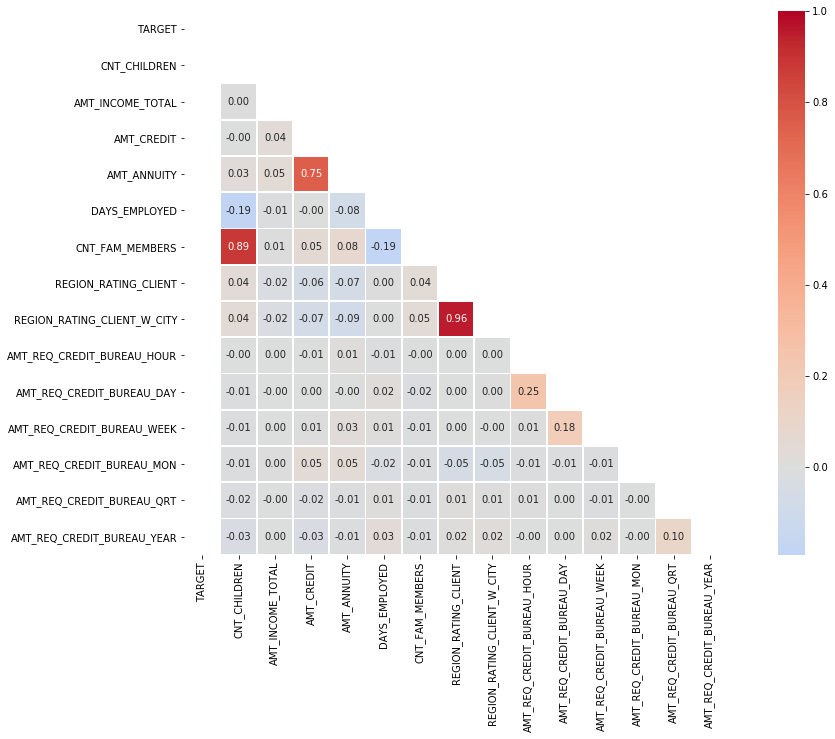

In [27]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, fmt=".2f", square=True, linewidths=.7)
plt.show()

## Column Encoder

In [28]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [29]:
encode_column_list = [
    'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'WEEKDAY_APPR_PROCESS_START'
]

In [30]:
encoded_df = MultiColumnLabelEncoder(columns = encode_column_list).fit_transform(df)

In [31]:
encoded_df

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            1                   0            1             0   
26           1                   0            0             0   
40           1                   0            1             0   
42           1                   0            0             0   
81           1                   0            0             0   
...        ...                 ...          ...           ...   
307448       1                   0            1             0   
307475       1                   0            0             0   
307481       1                   0            1             0   
307489       1                   0            0             0   
307509       1                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
26                    1             0          112500.0    979992.0   
40                    1             0          202500.0   1193580.0   
42                    0             0          135000.0    288873.0   
81                    1             0           81000.0    252000.0   
...                 ...           ...               ...         ...   
307448                0             1          207000.0    450000.0   
307475                0             1          144000.0   1303200.0   
307481                1             0          225000.0    297000.0   
307489                1             0          225000.0    521280.0   
307509                1             0          171000.0    370107.0   

        AMT_ANNUITY  NAME_INCOME_TYPE  ...  CNT_FAM_MEMBERS  \
0           24700.5                 5  ...              1.0   
26          27076.5                 5  ...              1.0   
40          35028.0                 0  ...              2.0   
42          16258.5                 5  ...              2.0   
81          14593.5                 2  ...              2.0   
...             ...               ...  ...              ...   
307448      32746.5                 5  ...              3.0   
307475      46809.0                 5  ...              3.0   
307481      19975.5                 5  ...              2.0   
307489      23089.5                 0  ...              2.0   
307509      20205.0                 0  ...              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                          2                            2   
26                         3                            2   
40                         2                            2   
42                         3                            3   
81                         2                            2   
...                      ...                          ...   
307448                     3                            3   
307475                     2                            2   
307481                     2                            2   
307489                     2                            2   
307509                     2                            2   

        WEEKDAY_APPR_PROCESS_START  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                                6                         0.0   
26                               1                         0.0   
40                               5                         0.0   
42                               4                         0.0   
81                               4                         0.0   
...                            ...                         ...   
307448                           1                         0.0   
307475                           4                         0.0   
307481                           0                         0.0   
307489                           0                         0.0   
307509                           6                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         

## Splitting the data into Features and Target

In [32]:
X = encoded_df.iloc[:, 1:]
y = encoded_df.iloc[:, :1]

In [33]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)
X

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
26                       0            0             0                1   
40                       0            1             0                1   
42                       0            0             0                0   
81                       0            0             0                1   
...                    ...          ...           ...              ...   
307448                   0            1             0                0   
307475                   0            0             0                0   
307481                   0            1             0                1   
307489                   0            0             0                1   
307509                   0            0             0                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
26                 0          112500.0    979992.0      27076.5   
40                 0          202500.0   1193580.0      35028.0   
42                 0          135000.0    288873.0      16258.5   
81                 0           81000.0    252000.0      14593.5   
...              ...               ...         ...          ...   
307448             1          207000.0    450000.0      32746.5   
307475             1          144000.0   1303200.0      46809.0   
307481             0          225000.0    297000.0      19975.5   
307489             0          225000.0    521280.0      23089.5   
307509             0          171000.0    370107.0      20205.0   

        NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                      5                    4                   3   
26                     5                    4                   4   
40                     0                    4                   1   
42                     5                    4                   0   
81                     2                    4                   1   
...                  ...                  ...                 ...   
307448                 5                    4                   1   
307475                 5                    1                   0   
307481                 5                    4                   1   
307489                 0                    4                   0   
307509                 0                    4                   1   

        DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                -637              1.0                     2   
26              -2628              1.0                     3   
40              -1262              2.0                     2   
42              -3597              2.0                     3   
81             365243              2.0                     2   
...               ...              ...                   ...   
307448          -3048              3.0                     3   
307475          -2405              3.0                     2   
307481          -3147              2.0                     2   
307489           -286              2.0                     2   
307509          -4786              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                                 2                           6   
26                                2                           1   
40                                2                           5   
42                                3                           4   
81                                2                           4   
...                             ...                         ...   
307448                            3                           1   
307475                            2                           4   
307481                            2                           0   
307489                            2           

## Standardizing the Features

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying KMeans Clustering

In [35]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init="random", n_clusters=3, n_init=15, max_iter=200, random_state=42)

In [36]:
kmeans_model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=200, n_clusters=3,
       n_init=15, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [37]:
print("Locations of the centroid:")
kmeans_model.cluster_centers_

Locations of the centroid:


array([[-2.72455899e-02, -3.88569449e-02, -4.14537547e-02,
        -3.33052177e-02, -2.33939455e-01, -2.84242630e-02,
        -5.60717322e-02, -7.25831684e-02,  8.07517326e-02,
        -8.40822996e-03,  2.79863274e-02,  4.35402605e-02,
        -2.04736771e-01,  1.67583193e+00,  1.64620837e+00,
         1.71312239e-03,  1.75138108e-02,  1.15500351e-02,
         1.79305619e-02, -6.96396480e-02,  2.13399643e-02,
         2.79838566e-02],
       [ 2.32960579e-02,  1.10250527e-02,  1.49807072e-01,
         2.80825020e-02,  1.41266823e+00,  2.36932339e-02,
         2.87449055e-02,  8.80388280e-02,  1.21572880e-01,
         1.29650689e-02, -4.72628906e-01, -3.32031291e-01,
         1.38286881e+00, -2.06159591e-01, -2.08696051e-01,
        -5.66319712e-03, -5.19791050e-03, -2.44861847e-02,
        -1.79359340e-02, -1.39807430e-02, -3.24802835e-02,
        -6.02753426e-02],
       [-1.19887233e-03,  7.87010200e-03, -5.11764124e-02,
        -1.29514717e-03, -5.33600764e-01, -9.87220933e-04,
    

In [38]:
print(f"Iterations required to coverage: {kmeans_model.n_iter_}")
print(f"Lowest SSE value: {kmeans_model.inertia_}")

Iterations required to coverage: 21
Lowest SSE value: 478849.3707251227


In [39]:
y_pred = kmeans_model.predict(X_scaled)

#### Applying Principal Component Analysis

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_scaled)
results = pd.DataFrame(pca,columns=['pca1','pca2'])

In [41]:
results

pca1      pca2
0     -1.630328  0.034685
1     -1.697448 -0.455470
2     -0.016381  1.910799
3      0.175038 -2.646538
4     -1.612573 -0.456794
...         ...       ...
24820  1.629121 -1.911980
24821  2.081977  1.901734
24822 -0.371928 -0.360562
24823 -0.334183  0.257805
24824 -0.794966  0.047369

[24825 rows x 2 columns]

In [42]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

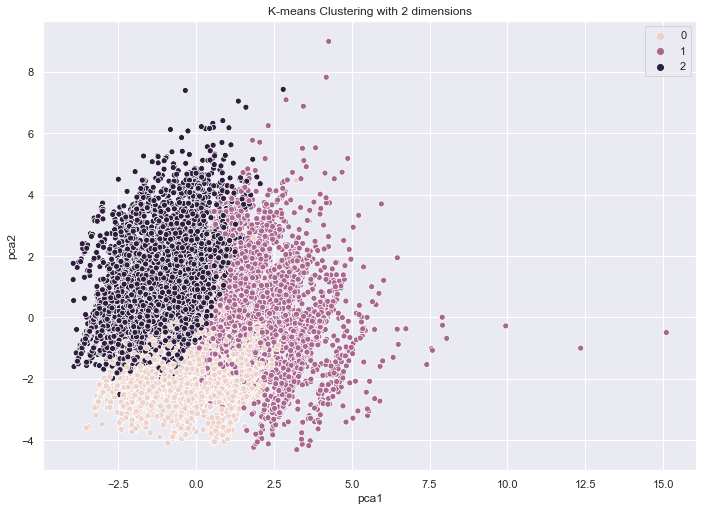

In [43]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.scatterplot(x="pca1", y="pca2", hue=y_pred, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Elbow method for selecting of the number of clusters

In [44]:
def kmeans_elbow(X, clusters_list):
    sse = []
    for cluster_num in clusters_list:
        kmeans = KMeans(n_clusters=cluster_num)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.clf()
    plt.figure(figsize=(6, 6))
    plt.plot(clusters_list, sse, '-o')
    plt.xlabel('Number of Custers')
    plt.ylabel('Sum of Squared Distance')
    plt.plot()

<Figure size 842.4x595.44 with 0 Axes>

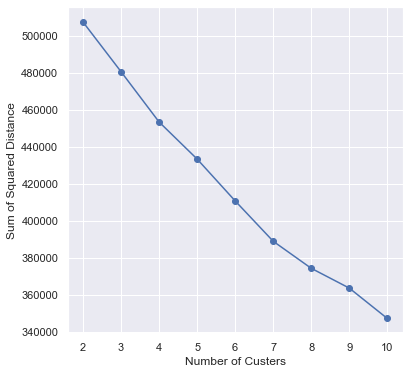

In [45]:
kmeans_elbow(X_scaled, list(range(2, 11)))

# Fuzzy C-means Clustering (FCM) 
## Implementation of fuzzy-c-means library

!pip install fuzzy-c-means

In [46]:
from fcmeans import FCM

In [47]:
fcm_model = FCM(n_clusters=3)
fcm_model.fit(X_scaled)

In [48]:
fcm_centers = fcm_model.centers
y_pred = fcm_model.u.argmax(axis=1)

In [49]:
print("Cluster Centers:")
print(fcm_centers)

Cluster Centers:
[[ 1.31352651e-10 -8.94887601e-10  2.49819895e-09  1.36757318e-10
   1.52106397e-08 -2.08317715e-10 -1.41541091e-10  2.49528777e-10
   6.18765397e-09  1.16884248e-09 -1.23745908e-08 -5.62257267e-09
   1.80842359e-08  1.14492047e-08  1.14200071e-08 -2.63136063e-10
   1.21635914e-11 -8.21257109e-12 -2.08097154e-11 -4.07682568e-10
  -5.57944193e-11 -2.66546701e-11]
 [-1.79797025e-08  5.46756534e-08  9.90511975e-08  8.31252439e-09
   1.70560487e-07  5.37731544e-09  8.35420572e-08  9.66750770e-08
   4.02228402e-08 -9.48961548e-09 -1.58752953e-07 -7.92093483e-08
   2.13552970e-07 -2.84266206e-09 -2.99861259e-09 -1.13493903e-09
   7.96581967e-11 -4.23522384e-10 -7.06174901e-12  2.43549170e-09
  -4.57327263e-09 -7.83436194e-09]
 [ 1.78483422e-08 -5.37807660e-08 -1.01549397e-07 -8.44927717e-09
  -1.85771112e-07 -5.16899847e-09 -8.34005182e-08 -9.69246072e-08
  -4.64104878e-08  8.32078051e-09  1.71127554e-07  8.48319197e-08
  -2.31637198e-07 -8.60654540e-09 -8.42139653e-09  1.39

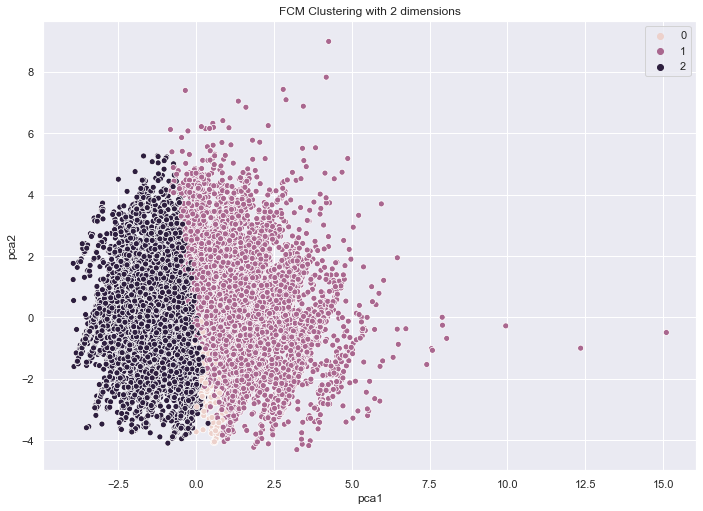

In [50]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.scatterplot(x="pca1", y="pca2", hue=y_pred, data=results)
plt.title('FCM Clustering with 2 dimensions')
plt.show()

## Implementation of skfuzzy Library

In [51]:
import skfuzzy as fuzz

In [52]:
alldata = np.vstack((results['pca1'], results['pca2']))

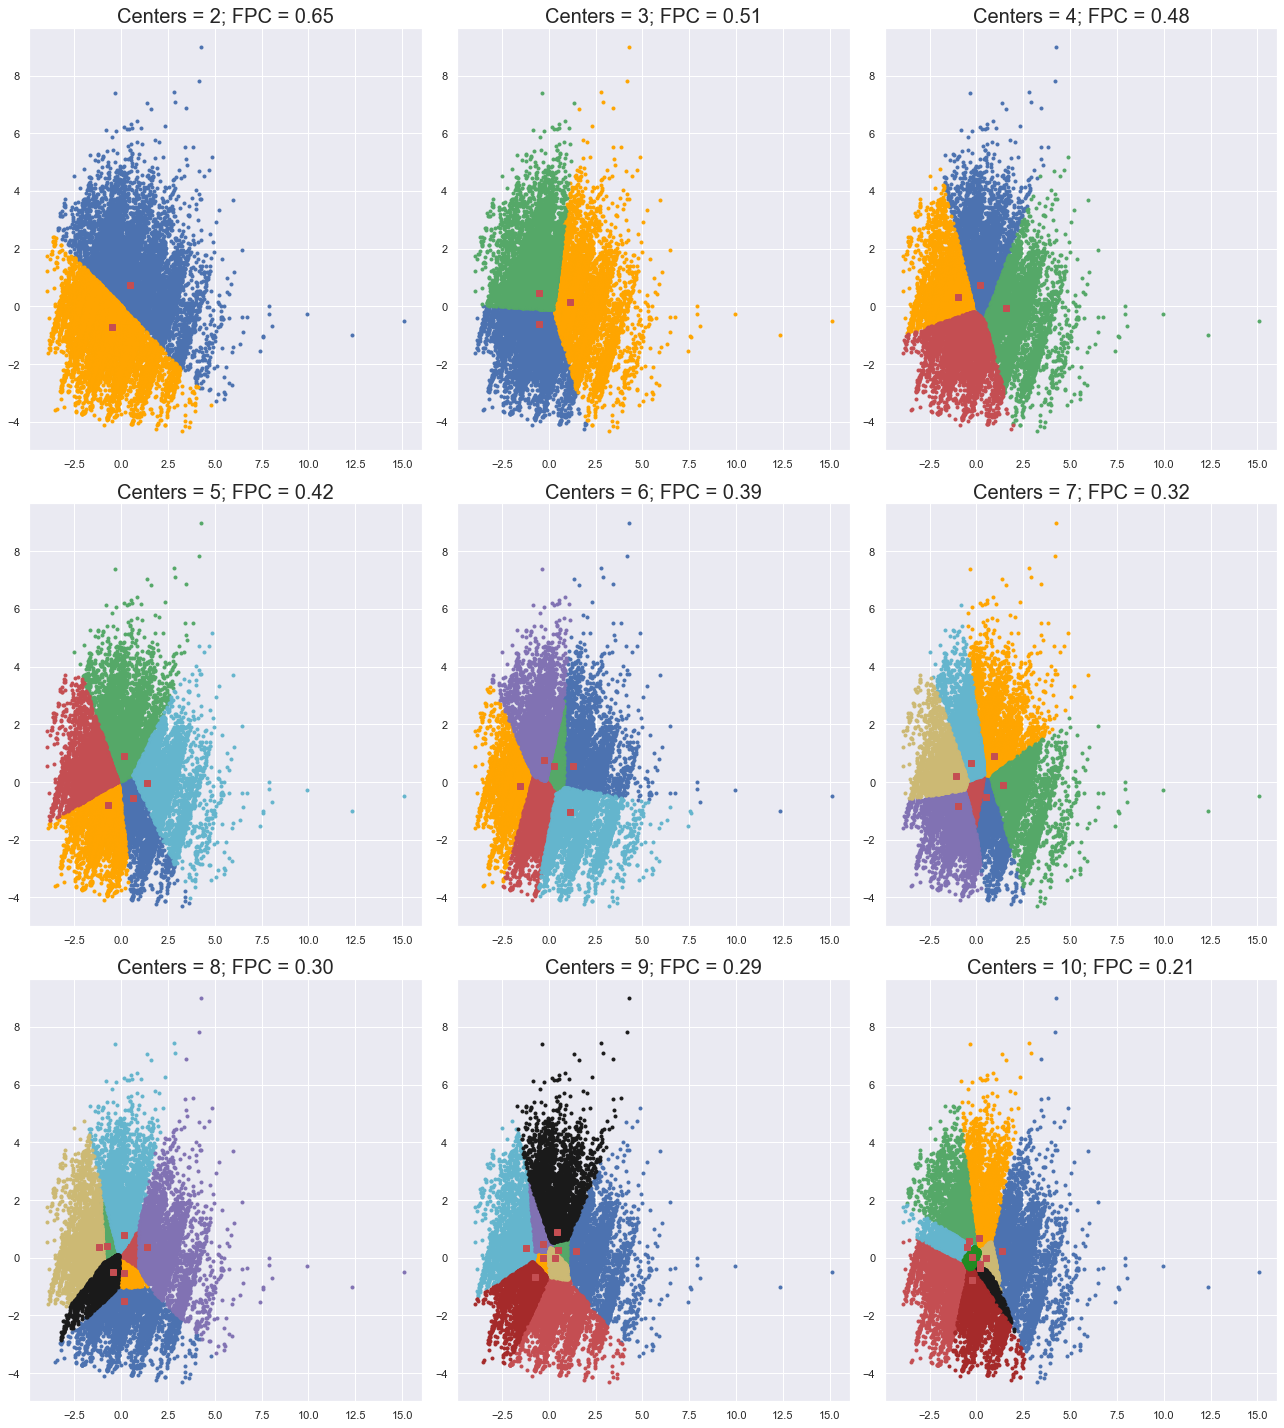

In [53]:
fpcs = []
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
for ncenters, ax in enumerate(axes.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2,
                                                     error=0.005, maxiter=10, init=None)
    fpcs.append(fpc)
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(results['pca1'][cluster_membership == j],
                results['pca2'][cluster_membership == j], '.', color=colors[j])
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    ax.set_title(f'Centers = {ncenters}; FPC = {fpc:.2f}', fontsize=20)
fig.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

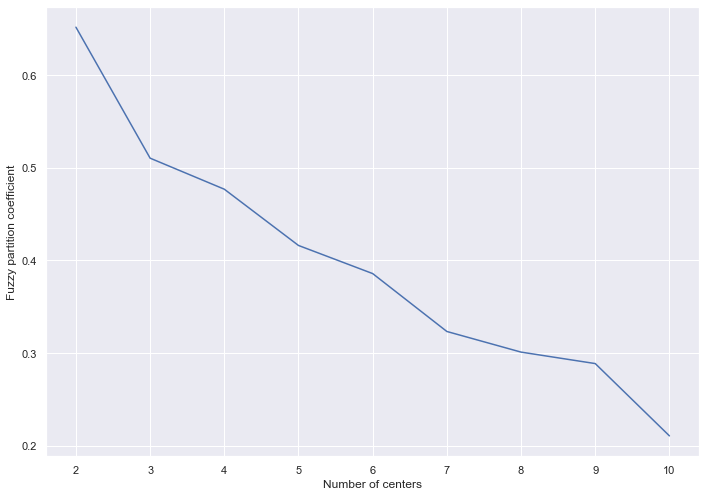

In [54]:
fig, ax = plt.subplots()
ax.plot(np.r_[2:11], fpcs)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")

From the above visualization, it can be concluded that the ideal number of centers for the dataset is 2.

## Trained Model

<Figure size 842.4x595.44 with 0 Axes>

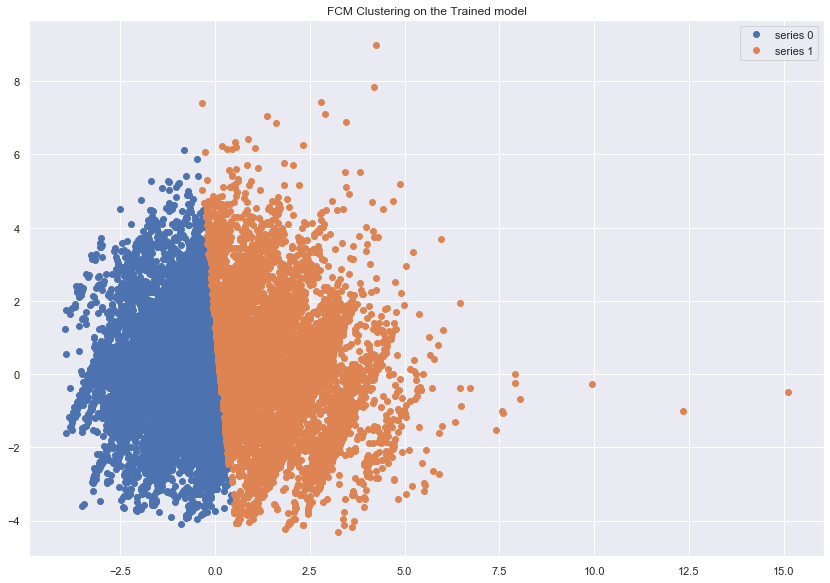

In [55]:
plt.clf()
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 2, 2, error=0.005, maxiter=1000)

fig, ax = plt.subplots()
ax.set_title('FCM Clustering on the Trained model')
for j in range(2):
    ax.plot(results['pca1'][u_orig.argmax(axis=0) == j],
             results['pca2'][u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax.legend()
fig.tight_layout()

In [56]:
cluster1_labels = u_orig.argmax(axis=0) == 0

In [57]:
cluster2_labels = u_orig.argmax(axis=0) == 1

In [58]:
fuzzy_clusters = cluster1_labels.astype(int)

In [59]:
encoded_df['FUZZY_CLUSTERS'] = fuzzy_clusters 

In [60]:
batch1 = encoded_df.loc[encoded_df['FUZZY_CLUSTERS'] == 0]

In [61]:
batch2 = encoded_df.loc[encoded_df['FUZZY_CLUSTERS'] == 1]

In [62]:
X_batch1 = batch1.iloc[:, 1:-1]
y_batch1 = batch1.iloc[:, :1]

In [63]:
X_batch2 = batch2.iloc[:, 1:-1]
y_batch2 = batch2.iloc[:, :1]

In [64]:
import tensorflow as tf

In [65]:
# Square Nonlinearity
def SQML(x):
    orig = x
    x = tf.where(orig > 2.0, (tf.ones_like(x)), x)
    x = tf.where(tf.logical_and(0.0 <= orig, orig <= 2.0),
                 (x - tf.math.square(x) / 4.), x)
    x = tf.where(tf.logical_and(-2.0 <= orig, orig < 0),
                 (x + tf.math.square(x) / 4.), x)
    return tf.where(orig < -2.0, -tf.ones_like(x), x)

In [66]:
# ElliotSig
def softsign(X):
    return X / (tf.math.abs(X) + 1)

In [67]:
# Inverse Square Root Function
def ISRU(X, alpha=0.1):
    return X / tf.math.sqrt(1 + alpha * tf.math.square(X))

In [68]:
from keras.models import Sequential
from keras.layers import Dense

In [69]:
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

In [70]:
get_custom_objects().update({'sqml': Activation(SQML)})

In [71]:
get_custom_objects().update({'softsign': Activation(softsign)})

In [72]:
get_custom_objects().update({'isru': Activation(ISRU)})

In [73]:
X.iloc[:,:-1]

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
26                       0            0             0                1   
40                       0            1             0                1   
42                       0            0             0                0   
81                       0            0             0                1   
...                    ...          ...           ...              ...   
307448                   0            1             0                0   
307475                   0            0             0                0   
307481                   0            1             0                1   
307489                   0            0             0                1   
307509                   0            0             0                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
26                 0          112500.0    979992.0      27076.5   
40                 0          202500.0   1193580.0      35028.0   
42                 0          135000.0    288873.0      16258.5   
81                 0           81000.0    252000.0      14593.5   
...              ...               ...         ...          ...   
307448             1          207000.0    450000.0      32746.5   
307475             1          144000.0   1303200.0      46809.0   
307481             0          225000.0    297000.0      19975.5   
307489             0          225000.0    521280.0      23089.5   
307509             0          171000.0    370107.0      20205.0   

        NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                      5                    4                   3   
26                     5                    4                   4   
40                     0                    4                   1   
42                     5                    4                   0   
81                     2                    4                   1   
...                  ...                  ...                 ...   
307448                 5                    4                   1   
307475                 5                    1                   0   
307481                 5                    4                   1   
307489                 0                    4                   0   
307509                 0                    4                   1   

        DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                -637              1.0                     2   
26              -2628              1.0                     3   
40              -1262              2.0                     2   
42              -3597              2.0                     3   
81             365243              2.0                     2   
...               ...              ...                   ...   
307448          -3048              3.0                     3   
307475          -2405              3.0                     2   
307481          -3147              2.0                     2   
307489           -286              2.0                     2   
307509          -4786              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                                 2                           6   
26                                2                           1   
40                                2                           5   
42                                3                           4   
81                                2                           4   
...                             ...                         ...   
307448                            3                           1   
307475                            2                           4   
307481                            2                           0   
307489                            2           

In [115]:
model = Sequential()
model.add(Dense(5, input_dim=X_batch1.shape[1], activation=SQML))
model.add(Dense(5, activation=SQML))
model.add(Dense(5, activation=SQML))
model.add(Dense(5, activation=SQML))
model.add(Dense(3, activation=SQML))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 5)                 115       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 18        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [117]:
model_history = model.fit(X_batch1, y_batch1, epochs=10, batch_size=20)

Epoch 1/10
542/542 [==============================] - 2s 3ms/step - loss: 0.0576 - accuracy: 0.8692
Epoch 2/10
542/542 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.9966
Epoch 3/10
542/542 [==============================] - 2s 3ms/step - loss: 4.0204e-04 - accuracy: 0.9966
Epoch 4/10
542/542 [==============================] - 2s 3ms/step - loss: 2.1022e-04 - accuracy: 0.9966
Epoch 5/10
542/542 [==============================] - 2s 3ms/step - loss: 1.3183e-04 - accuracy: 0.9966
Epoch 6/10
542/542 [==============================] - 2s 3ms/step - loss: 9.1952e-05 - accuracy: 0.9966
Epoch 7/10
542/542 [==============================] - 2s 3ms/step - loss: 6.8813e-05 - accuracy: 0.9966
Epoch 8/10
542/542 [==============================] - 2s 3ms/step - loss: 5.4130e-05 - accuracy: 0.9966
Epoch 9/10
542/542 [==============================] - 2s 3ms/step - loss: 4.4191e-05 - accuracy: 0.9966
Epoch 10/10
542/542 [==============================] - 2s 3ms/step - los

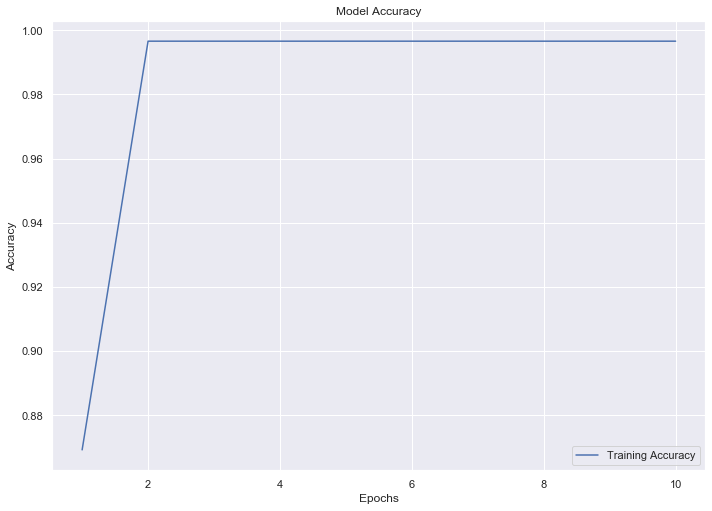

In [118]:
accuray_values = model_history.history['accuracy']
epochs = range(1, len(accuray_values) + 1)

plt.plot(epochs, accuray_values, label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

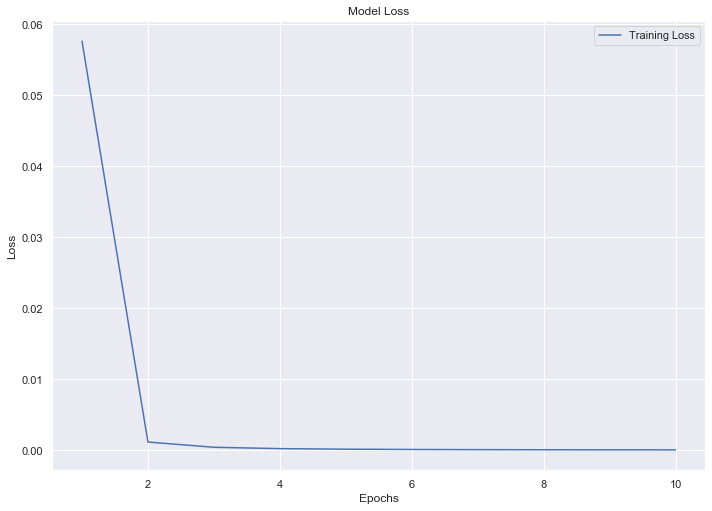

In [119]:
loss_values = model_history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## References
Madson Luiz Dantas Dias. fuzzy-c-means: An implementation of Fuzzy C-means clustering algorithm (2019). Federal University of Cear, Department of Computer Science. Retrieved from https://github.com/omadson/fuzzy-c-means

Moradi, S., Mokhatab Rafiei, F. A dynamic credit risk assessment model with data mining techniques: evidence from Iranian banks. Financ Innov 5, 15 (2019). Retrieved from https://doi.org/10.1186/s40854-019-0121-9